# [실습6] 인공지능을 활용한 건설로봇 Motion Control (정답)
---

## 실습 목표

- Gymnasium 라이브러리를 사용하는 방법을 학습합니다.
- Inverted pendulum, Cartpole 환경을 사용하는 방법을 학습합니다.
- 고전적인 제어기로 비선형 모델들을 제어해봅니다.
- 강화학습 알고리즘을 직접 구현해보고 학습시켜봅니다.
- 여러가지 강화학습 알고리즘과 성능을 비교해봅니다.

---

## 실습 목차

1. **Gymnasium 라이브러리 사용하기** 

2. **고전 제어기로 비선형 모델 제어** 

3. **모델 기반 제어기로 비선형 모델 제어**

4. **Reinforce 강화학습 알고리즘 적용** 

5. **Actor-Critic 강화학습 알고리즘 적용** 

6. **A2C 강화학습 알고리즘 적용**
---

## 실습 개요

이번 실습에서는 여러가지 강화학습 알고리즘을 직접 구현하고 학습하는 것을 목표로 합니다. 이를 위해 Gymnasium 라이브러리를 사용하는 방법을 학습합니다.

---

## 1. Gymnasium 라이브러리 사용하기

---

### 1.1 필수 라이브러리 불러오기
강화학습 알고리즘을 학습하고 테스트해보기 위해 여러 가지 시뮬레이션을 사용할 수 있습니다.

그 중, 가장 간단하고 추가적인 엔진 설치가 필요 없는 Gymnasium 라이브러리를 소개합니다.

Gymnasium은 시뮬레이터와 연동시켜 강화학습 알고리즘을 학습시키기 위한 기본적인 라이브러리입니다. 하지만, 추가적인 시뮬레이터가 없더라도, 기본적으로 Gymnasium 내부에서 제공하고 있는 간단한 시뮬레이션들이 있습니다. 

이번 실습에서는 Inverted Pendulum과 Cartpole 모델을 사용하겠습니다. 이 두 비선형 모델은 강화학습 뿐만 아니라 대부분의 로봇 제어기의 벤치마크로 활용되는 대표적인 모델들입니다.

In [1]:
## 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gymnasium as gym
from IPython import display

random_seed = 42
np.random.seed(random_seed)


---
### 1.2 Inverted Pendulum 모델 사용하기
Inverted Pendulum 모델과 상호작용 하는 방법을 소개합니다.

Jupyter notebook 환경에서 Gymnasium의 상호작용 시각화 윈도우를 확인하려면 별도의 코드를 사용해야 합니다. IPython의 display 기능을 사용할 수 있도록 함수를 작성합니다.

In [2]:
def render_env(env):
    plt.figure(figsize=(5, 5))
    plt.imshow(env.render())
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.close()

상호작용할 수 있는 시뮬레이션을 환경(env)라고 합니다. 라이브러리 내에 내장되어 있는 invertd pendulum 모델을 불러옵니다.

Env를 설정하면 로봇의 모델(동역학), 센서(observation), 제어기(action_space)등이 결정됩니다.

In [3]:
env = gym.make('Pendulum-v1', render_mode="rgb_array")

print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)

Observation Space: Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Action Space: Box(-2.0, 2.0, (1,), float32)


설정된 환경을 시각화해봅니다.

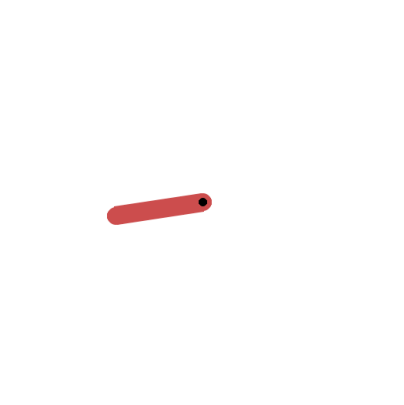

In [4]:
observation = env.reset(seed=random_seed)
render_env(env)

환경에 제어 입력을 가해보겠습니다. 랜덤한 제어 입력을 샘플한 후, 이를 환경에 가해봅니다.

동역학에 제어 입력이 입력된 후, 다음 로봇 상태가 계산됩니다. 

연속된 동작을 확인하기 위해 100 번의 제어 입력을 가해보겠습니다.

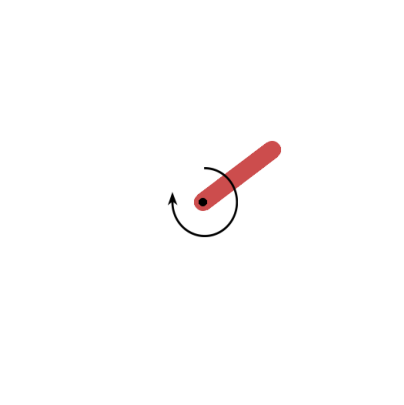

In [5]:
for _ in range(100):
    action = env.action_space.sample()  # Random action for demonstration
    observation, reward, terminated, truncated, info = env.step(action)
    render_env(env)
    if terminated or truncated:
        observation = env.reset(seed=random_seed)

---
### 1.3 Cartpole 모델 사용하기
Cartpole 모델과 상호작용 하는 방법을 소개합니다. 기본적인 방법은 동일합니다.

In [6]:
env = gym.make('CartPole-v1', render_mode="rgb_array")

print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)

Observation Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action Space: Discrete(2)


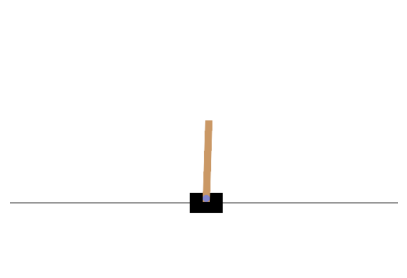

In [9]:
observation = env.reset(seed=random_seed)
render_env(env)

### [TODO] 설정한 환경 env를 한 스텝 실행해보세요. 한 스텝을 진행하기 위해서는 제어 입력을 인자로 넣어줘야 합니다.

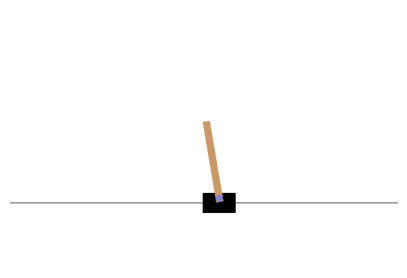

In [10]:
for _ in range(100):
    action = env.action_space.sample()  # Random action for demonstration
    observation, reward, terminated, truncated, info = env.step(action)
    render_env(env)
    if terminated or truncated:
        observation = env.reset(seed=random_seed)

Cartpole은 가운대의 막대가 떨어지면 실패로 간주합니다. 실패를 하더라도 환경을 리셋하지 않게하면 보다 연속된 동작을 볼 수 있습니다.

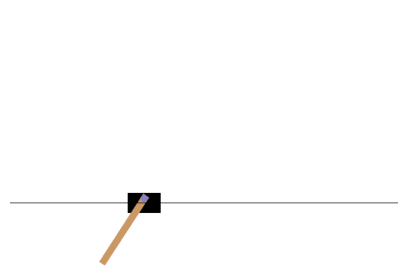

In [11]:
for _ in range(100):
    action = env.action_space.sample()  # Random action for demonstration
    observation, reward, terminated, truncated, info = env.step(action)
    render_env(env)

---
## 2. 고전 제어기로 비선형 모델 제어

---
### 2.1 고전 제어기 설계
강화학습 실습에 들어가기 앞서, 고전 제어기의 한계점을 분석해보겠습니다.

고전 제어기는 일반적으로 목표하는 desired state와 현재 상태 current state의 차이를 에러로 정의합니다. 그 에러를 최소화하는 것을 제어기의 목표로 설정합니다.

고전 제어기는 PID, LQR, SMC 등 많은 방법들이 연구되어 왔습니다.

가장 간단한 불연속한 제어기부터 설계해보겠습니다.


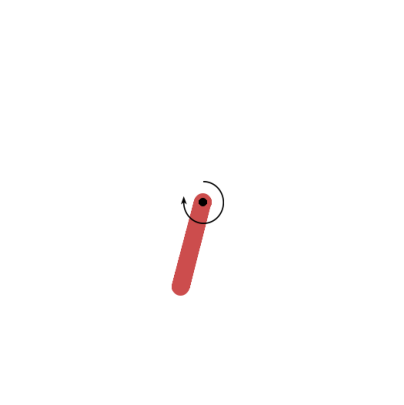

In [12]:

# Create the Pendulum environments
env_pendulum = gym.make('Pendulum-v1', render_mode='rgb_array')
obs = env_pendulum.reset(seed=random_seed)[0]
num_steps = 200

# Simple controller for Pendulum
def simple_controller_pendulum(obs, max_torque=2.0):
    # observation에서 theta를 추출
    cos_theta = obs[0]
    sin_theta = obs[1]
    theta = np.arctan2(sin_theta, cos_theta)

    if theta > 0.0:
        # pendulum이 왼쪽에 있을 때, 시계 방향으로 힘을 가함
        action = [-max_torque]
    else:
        # pendulum이 오른쪽에 있을 때, 반시계 방향으로 힘을 가함
        action = [max_torque]
    return action

episode_reward = 0
for step in range(num_steps):
    action = simple_controller_pendulum(obs, max_torque=1.0)

    obs, reward, terminated, truncated, info = env_pendulum.step(action)
    episode_reward += reward

    render_env(env_pendulum)

env_pendulum.close()


간단한 논리로 만든 제어기는 최대 토크가 1일 때는 전혀 작동하지 않는 것을 확인할 수 있습니다.

환경에서 허용하는 최대 토크는 2입니다. 2를 가하면 중력의 도움없이도 강제로 막대를 제어할 수 있습니다.

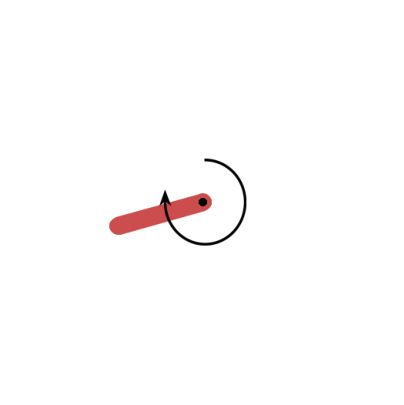

In [15]:
obs = env_pendulum.reset(seed=random_seed)[0]
num_steps = 200

episode_reward = 0
for step in range(num_steps):
    action = simple_controller_pendulum(obs, max_torque=2.0)

    obs, reward, terminated, truncated, info = env_pendulum.step(action)
    episode_reward += reward

    render_env(env_pendulum)

env_pendulum.close()



---
### 2.2 PID 제어기 설계

다음은 PID 제어기를 설계해보겠습니다.

In [16]:
class PIDController:
    def __init__(self, Kp, Ki, Kd):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.integral = 0
        self.previous_error = 0

    def reset(self):
        self.integral = 0
        self.previous_error = 0

    def compute(self, error, dt):
        self.integral += error * dt
        derivative = (error - self.previous_error) / dt
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.previous_error = error
        return output

PID 게인을 설정합니다.

### [TODO] PID 게인을 설정합니다. P,I,D 게인을 각각 5.0, 0.01, 0.5 로 설정합니다.

In [17]:
# PID parameters
Kp = 5.0
Ki = 0.01
Kd = 0.5

# Create the PID controller
pid = PIDController(Kp, Ki, Kd)

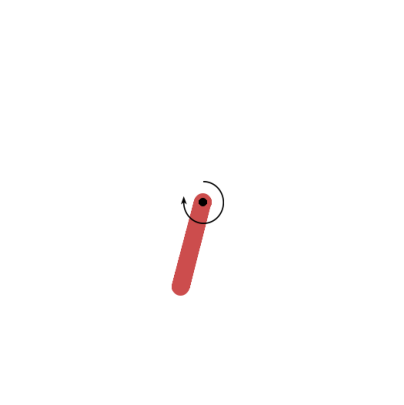

In [18]:

# Create the Pendulum environments
env_pendulum = gym.make('Pendulum-v1', render_mode='rgb_array')
obs = env_pendulum.reset(seed=random_seed)[0]
num_steps = 200


def pid_controller_pendulum(obs, pid, target_theta=0, dt=0.02, max_torque=2.0):
    # observation에서 theta를 추출
    cos_theta = obs[0]
    sin_theta = obs[1]
    theta = np.arctan2(sin_theta, cos_theta)

    error = target_theta - theta
    torque = pid.compute(error, dt)
    return [np.clip(torque, -max_torque, max_torque)] 


episode_reward = 0
for step in range(num_steps):
    # Get the action from the simple controller
    action = pid_controller_pendulum(obs, pid, max_torque=1.0)

    # Take a step in the environment
    obs, reward, terminated, truncated, info = env_pendulum.step(action)
    episode_reward += reward

    # Render the environment
    render_env(env_pendulum)

    #print(f"Step {step+1}: Reward = {episode_reward:.2f}")

# Close the Pendulum environment
env_pendulum.close()


PID 제어기는 모델을 사용하지 않는 제어기입니다. 따라서, 비선형 모델일 경우 성능이 좋지 않습니다.

PID가 좋은 성능을 발휘할 때는 모델이 선형에 가까운 경우, 즉 이 환경에서는 막대가 이미 안정점 근처에 있는 경우입니다.

Gymnasium에서는 초기 상태를 설정하는 것이 불가능합니다. 위의 코드를 여러번 실행하면 PID가 제어에 성공하는 케이스를 확인할 수 있습니다.

---
## 3. 모델 기반 제어기로 비선형 모델 제어

---
### 3.1 모델 기반 제어기 소개
고전 제어기의 한계는 모델을 고려하지 않기 때문에 비선형 모델에서 좋은 제어 성능을 발휘할 수 없다는 것입니다.

이번에는 모델을 사용하는 현대 제어기를 사용해보겠습니다.

현대 제어기 중 실제로 가장 많이 사용되는 제어기는 MPC 기반의 제어기들입니다.

MPC는 모델을 이용하여 미래에 모델이 어떻게 움직이는지 분석하여 최적화를 수행합니다. 따라서 비선형 모델을 효과적으로 제어할 수 있습니다.

기울기 기반의 MPC인 iLQR, DDP가 잘 알려져있습니다. 기울기 기반의 MPC보다 더 빠르게 최적화를 수행할 수 있는 샘플링 기반 MPC를 실습으로 사용해보겠습니다.

Model Predictive Path Integral Control (MPPI) 제어기는 여러개의 제어입력 궤적을 샘플링하여 동시에 궤적을 계산합니다. 이를 통해 최적의 제어입력을 계산할 수 있습니다. 이때, 여러개의 궤적을 GPU로 동시에 시뮬레이션할 수 있기 때문에, 실시간으로 복잡한 모델을 제어할 수 있는 강력한 제어기로 알려져있습니다.

본 실습에서는 100개의 적은 궤적만 사용하므로 cpu로 진행해보겠습니다.


In [21]:
from pytorch_mppi import MPPI
import torch
import math

torch.manual_seed(random_seed)

TIMESTEPS = 15  # 예측할 미래 궤적의 시간 수
N_SAMPLES = 100  # 동시에 샘플링할 궤적 수
ACTION_LOW = -1.0
ACTION_HIGH = 1.0

d = "cpu"
dtype = torch.double
nx = 2

noise_sigma = torch.tensor(10, device=d, dtype=dtype)
# noise_sigma = torch.tensor([[10, 0], [0, 10]], device=d, dtype=dtype)
lambda_ = 1.

# pendulum의 동역학
def dynamics(state, perturbed_action):
        # true dynamics from gym
        th = state[:, 0].view(-1, 1)
        thdot = state[:, 1].view(-1, 1)

        g = 10
        m = 1
        l = 1
        dt = 0.05

        u = perturbed_action
        u = torch.clamp(u, -2, 2)

        newthdot = thdot + (3 * g / (2 * l) * np.sin(th) + 3.0 / (m * l ** 2) * u) * dt
        newthdot = np.clip(newthdot, -8, 8)
        newth = th + newthdot * dt

        state = torch.cat((newth, newthdot), dim=1)
        return state

def angle_normalize(x):
    return (((x + math.pi) % (2 * math.pi)) - math.pi)


def running_cost(state, action):
    theta = state[:, 0]
    theta_dt = state[:, 1]
    action = action[:, 0]
    cost = angle_normalize(theta) ** 2 + 0.1 * theta_dt ** 2
    return cost


# create controller with chosen parameters
ctrl = MPPI(dynamics, running_cost, nx, noise_sigma, num_samples=N_SAMPLES, horizon=TIMESTEPS,
            lambda_=lambda_, device=d,
            u_min=torch.tensor(ACTION_LOW, dtype=torch.double, device=d),
            u_max=torch.tensor(ACTION_HIGH, dtype=torch.double, device=d))



---
### 3.2 Inverted Pendulum 모델에 적용
pendulum 모델에 적용해보겠습니다.

In [23]:
# Create the Pendulum environments
env_pendulum = gym.make('Pendulum-v1', render_mode='rgb_array')
obs = env_pendulum.reset(seed=random_seed)[0]
num_steps = 200

episode_reward = 0
for step in range(num_steps):
    # observation에서 theta를 추출
    cos_theta = obs[0]
    sin_theta = obs[1]
    theta = np.arctan2(sin_theta, cos_theta)
    obs = np.array([[theta, obs[2]]])

    action = ctrl.command(obs)
    action = action.cpu().numpy()

    # Take a step in the environment
    obs, reward, terminated, truncated, info = env_pendulum.step(action)
    episode_reward += reward

    # Render the environment
    render_env(env_pendulum)

    print(f"Step {step+1}: Reward = {episode_reward:.2f}")

# Close the Pendulum environment
env_pendulum.close()

Step 200: Reward = -366.24


최대 제어 토크를 1로 설정해도, 중력을 이용해 막대를 스윙하며 제어에 성공하는 것을 볼 수 있습니다.

모델 기반 제어기와 달리, 시스템의 모델을 몰라도 제어가 가능한 강화학습 알고리즘들이 주목을 받고 있습니다.

또, 데이터가 충분하다면, 모델이 불확실하고 시간에 따라 변하는 상황에서도 강건하게 제어를 할 수 있습니다.

그리고 제어 입력이 이산화되어도 효과적으로 제어를 할 수 있다고 알려져있습니다. 이를 실습을 통해 알아보겠습니다.

---
## 4. Reinforce 강화학습 알고리즘 적용

---
### 4.1 Reinforce 알고리즘 구현
Reinforce 알고리즘은 강화학습의 가장 기본이 되는 알고리즘입니다.

강화학습에서 가장 기본으로 사용되는 라이브러리인 pytorch를 이용해 Reinforce 알고리즘을 구현해보겠습니다.

Reinforce 알고리즘을 이용해 inverted pendulum 환경을 학습해보겠습니다.

Reinforce는 가장 기초적인 알고리즘으로, 학습이 느리고 다양한 환경에서 잘 동작하지 않는다는 단점이 있습니다.

Inverted pendulum 문제는 제어 공간이 연속적입니다. 연속적인 제어 공간을 다룰 수 있는 여러가지 강화학습 알고리즘들이 있습니다 (ddpg 등).

이번 실습에서는 연속된 제어 공간을 위해 알고리즘을 수정하지 않고, Reinforce 알고리즘의 특성을 간접적으로 알아보겠습니다.

제어 입력인 토크를 -1, 0, 1로 설정하고 알고리즘을 설계해보겠습니다. 따라서 모델의 출력층 크기는 3이 되어야 합니다.

In [24]:


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

#Hyperparameters
learning_rate = 0.0008
gamma         = 0.98

class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.data = []
        
        self.fc1 = nn.Linear(3, 128)
        self.fc2 = nn.Linear(128, 3)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=0)
        return x
      
    def put_data(self, item):
        self.data.append(item)
        
    def train_net(self):
        R = 0
        self.optimizer.zero_grad()
        for r, prob in self.data[::-1]:
            R = r + gamma * R
            loss = -torch.log(prob) * R
            loss.backward()
        self.optimizer.step()
        self.data = []

---
### 4.2 Inverted pedulum 에 적용
알고리즘을 이용해 학습해보겠습니다.

In [25]:
env = gym.make('Pendulum-v1', render_mode='rgb_array')
pi = Policy()
score = 0.0
print_interval = 20
max_steps_per_episode = 200

action_map = [-1, 0, 1]  # Define the action mapping

for n_epi in range(5000):
    s, _ = env.reset(seed=random_seed)
    done = False
    step_count = 0
    
    while not done and step_count < max_steps_per_episode: # CartPole-v1 forced to terminates at 500 step.

        step_count += 1
        prob = pi(torch.from_numpy(s).float())

        m = Categorical(prob)
        a = m.sample()
        action = action_map[a.item()]

        s_prime, r, done, truncated, info = env.step([action])
        pi.put_data((r,prob[a]))
        s = s_prime
        score += r
        
    pi.train_net()
    
    if n_epi%print_interval==0 and n_epi!=0:
        print("# of episode :{}, avg score : {}".format(n_epi, score/print_interval))
        score = 0.0
env.close()

# of episode :20, avg score : -1170.1051440032393
# of episode :40, avg score : -1159.4327999281663
# of episode :60, avg score : -1169.4721933645253
# of episode :80, avg score : -1225.6691916844543
# of episode :100, avg score : -1253.9128420479196
# of episode :120, avg score : -1254.1982139991087
# of episode :140, avg score : -1191.8402380282175
# of episode :160, avg score : -1148.4445717392168
# of episode :180, avg score : -1203.657269760307
# of episode :200, avg score : -1196.982439220975
# of episode :220, avg score : -1194.621437778494
# of episode :240, avg score : -1148.5788562188275
# of episode :260, avg score : -1085.9510435820923
# of episode :280, avg score : -1092.699686377577
# of episode :300, avg score : -1154.1397266357276
# of episode :320, avg score : -1161.9682920322753
# of episode :340, avg score : -1253.2811156251862
# of episode :360, avg score : -1240.6557429075863
# of episode :380, avg score : -1204.54106205745
# of episode :400, avg score : -1061.3163

학습이 완료된 모델을 불러와 다양한 초기조건에서 막대를 제어해보겠습니다.

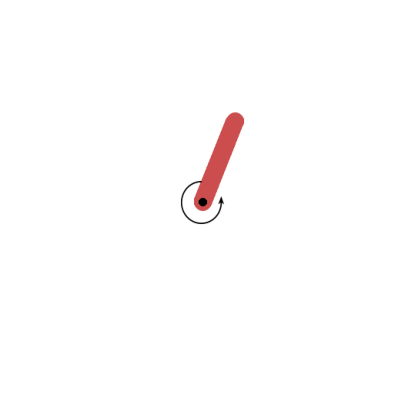

In [26]:
pi.eval()
env_pendulum = gym.make('Pendulum-v1', render_mode='rgb_array')
s, _ = env_pendulum.reset(seed=random_seed)

num_steps = 200

episode_reward = 0
for step in range(num_steps):

    prob = pi(torch.from_numpy(s).float())
    a = prob.argmax().item()  # Select the action with the highest probability
    s, r, done, truncated, info = env_pendulum.step([a])

    # Render the environment
    render_env(env_pendulum)

# Close the Pendulum environment
env_pendulum.close()

제어 결과, 학습이 잘 이뤄지지 않은 것을 볼 수 있습니다.

학습 iteration 수를 크게 늘리면 도움이 될 수 있지만, 다른 최신 강화학습 알고리즘을 사용하는 것이 더 합리적일 것입니다.

---
### 4.3 Cartpole 에 적용
Reinforce 알고리즘을 이용해 Cartpole 환경을 학습해보겠습니다.
policy의 입력과 출력층을 cartpole에 맞게 변경합니다.

In [27]:

#Hyperparameters
learning_rate = 0.0002
gamma         = 0.98

class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.data = []
        
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 2)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=0)
        return x
      
    def put_data(self, item):
        self.data.append(item)
        
    def train_net(self):
        R = 0
        self.optimizer.zero_grad()
        for r, prob in self.data[::-1]:
            R = r + gamma * R
            loss = -torch.log(prob) * R
            loss.backward()
        self.optimizer.step()
        self.data = []

Cartpole 환경에서 Reinforce 알고리즘을 학습시킵니다. 

학습에 시간이 조금 소요됩니다.

### [TODO] 환경에 적용할 제어 입력 a를 구합니다. 제어 정책의 출력을 카테고리 데이터로 변환한 변수에서 샘플링을 진행하여 획득할 수 있습니다.

In [28]:
env = gym.make('CartPole-v1')
pi = Policy()
score = 0.0
print_interval = 20


for n_epi in range(5000):
    s, _ = env.reset(seed=random_seed)
    done = False
    
    while not done: # CartPole-v1 forced to terminates at 500 step.
        prob = pi(torch.from_numpy(s).float())
        m = Categorical(prob)
        a = m.sample()
        s_prime, r, done, truncated, info = env.step(a.item())
        pi.put_data((r,prob[a]))
        s = s_prime
        score += r
        
    pi.train_net()
    
    if n_epi%print_interval==0 and n_epi!=0:
        print("# of episode :{}, avg score : {}".format(n_epi, score/print_interval))
        score = 0.0
env.close()

# of episode :20, avg score : 28.7
# of episode :40, avg score : 24.8
# of episode :60, avg score : 28.75
# of episode :80, avg score : 19.3
# of episode :100, avg score : 31.15
# of episode :120, avg score : 30.45
# of episode :140, avg score : 26.8
# of episode :160, avg score : 30.95
# of episode :180, avg score : 43.35
# of episode :200, avg score : 30.35
# of episode :220, avg score : 38.0
# of episode :240, avg score : 37.85
# of episode :260, avg score : 42.7
# of episode :280, avg score : 34.95
# of episode :300, avg score : 36.15
# of episode :320, avg score : 36.25
# of episode :340, avg score : 46.1
# of episode :360, avg score : 41.05
# of episode :380, avg score : 48.35
# of episode :400, avg score : 54.5
# of episode :420, avg score : 46.6
# of episode :440, avg score : 50.65
# of episode :460, avg score : 42.6
# of episode :480, avg score : 48.7
# of episode :500, avg score : 45.6
# of episode :520, avg score : 47.65
# of episode :540, avg score : 50.35
# of episode :560

학습이 완료된 모델을 이용해 테스트해보겠습니다.

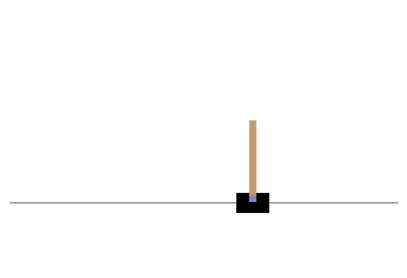

In [29]:
pi.eval()
env_cartpole = gym.make('CartPole-v1', render_mode='rgb_array')
s, _ = env_cartpole.reset(seed=random_seed)

num_steps = 200

episode_reward = 0
for step in range(num_steps):

    prob = pi(torch.from_numpy(s).float())
    a = prob.argmax().item()  # Select the action with the highest probability
    s, r, done, truncated, info = env_cartpole.step(a)

    # Render the environment
    render_env(env_cartpole)

env_cartpole.close()

Cartpole 모델은 제어 입력 공간이 이산화되어 있습니다 (왼쪽 혹은 오른쪽). 따라서 기본적인 Reinforce 알고리즘도 잘 작동하는 것을 볼 수 있습니다.

---
## 5. Actor-Critic 강화학습 알고리즘 적용

---
### 5.1 Actor-Critic  알고리즘 구현

강화학습에서 가장 기본으로 사용되는 라이브러리인 pytorch를 이용해 Actor-Critic  알고리즘을 구현해보겠습니다.

In [30]:
#Hyperparameters
learning_rate = 0.0002
gamma         = 0.98
n_rollout     = 10

class ActorCritic(nn.Module):
    def __init__(self):
        super(ActorCritic, self).__init__()
        self.data = []
        
        self.fc1 = nn.Linear(4,256)
        self.fc_pi = nn.Linear(256,2)
        self.fc_v = nn.Linear(256,1)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        
    def pi(self, x, softmax_dim = 0):
        x = F.relu(self.fc1(x))
        x = self.fc_pi(x)
        prob = F.softmax(x, dim=softmax_dim)
        return prob
    
    def v(self, x):
        x = F.relu(self.fc1(x))
        v = self.fc_v(x)
        return v
    
    def put_data(self, transition):
        self.data.append(transition)
        
    def make_batch(self):
        s_lst, a_lst, r_lst, s_prime_lst, done_lst = [], [], [], [], []
        for transition in self.data:
            s,a,r,s_prime,done = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r/100.0])
            s_prime_lst.append(s_prime)
            done_mask = 0.0 if done else 1.0
            done_lst.append([done_mask])
        
        s_batch, a_batch, r_batch, s_prime_batch, done_batch = torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
                                                               torch.tensor(r_lst, dtype=torch.float), torch.tensor(s_prime_lst, dtype=torch.float), \
                                                               torch.tensor(done_lst, dtype=torch.float)
        self.data = []
        return s_batch, a_batch, r_batch, s_prime_batch, done_batch
  
    def train_net(self):
        s, a, r, s_prime, done = self.make_batch()
        td_target = r + gamma * self.v(s_prime) * done
        delta = td_target - self.v(s)
        
        pi = self.pi(s, softmax_dim=1)
        pi_a = pi.gather(1,a)
        loss = -torch.log(pi_a) * delta.detach() + F.smooth_l1_loss(self.v(s), td_target.detach())

        self.optimizer.zero_grad()
        loss.mean().backward()
        self.optimizer.step()         

---
### 5.2 Cartpole에 적용

강화학습에서 가장 기본으로 사용되는 라이브러리인 pytorch를 이용해 Actor-Critic  알고리즘을 구현해보겠습니다.

Actor-Critic 알고리즘을 이용해 Cartpole 환경을 학습시켜보겠습니다.

학습에 시간이 조금 소요됩니다.

In [31]:
env = gym.make('CartPole-v1')
model = ActorCritic()    
print_interval = 20
score = 0.0

for n_epi in range(2000):
    done = False
    s, _ = env.reset(seed=random_seed)
    while not done:
        for t in range(n_rollout):
            prob = model.pi(torch.from_numpy(s).float())
            m = Categorical(prob)
            a = m.sample().item()
            s_prime, r, done, truncated, info = env.step(a)
            model.put_data((s,a,r,s_prime,done))
            
            s = s_prime
            score += r
            
            if done:
                break                     
        
        model.train_net()
        
    if n_epi%print_interval==0 and n_epi!=0:
        print("# of episode :{}, avg score : {:.1f}".format(n_epi, score/print_interval))
        score = 0.0
env.close()

C:\Users\302-26\AppData\Local\Temp\ipykernel_9396\1215267816.py:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  s_batch, a_batch, r_batch, s_prime_batch, done_batch = torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \


# of episode :20, avg score : 20.8
# of episode :40, avg score : 20.5
# of episode :60, avg score : 16.2
# of episode :80, avg score : 15.7
# of episode :100, avg score : 18.7
# of episode :120, avg score : 14.3
# of episode :140, avg score : 19.6
# of episode :160, avg score : 20.4
# of episode :180, avg score : 24.9
# of episode :200, avg score : 21.2
# of episode :220, avg score : 23.6
# of episode :240, avg score : 30.3
# of episode :260, avg score : 30.9
# of episode :280, avg score : 29.2
# of episode :300, avg score : 41.4
# of episode :320, avg score : 33.6
# of episode :340, avg score : 54.9
# of episode :360, avg score : 53.0
# of episode :380, avg score : 53.4
# of episode :400, avg score : 51.3
# of episode :420, avg score : 72.8
# of episode :440, avg score : 73.5
# of episode :460, avg score : 81.2
# of episode :480, avg score : 120.2
# of episode :500, avg score : 124.5
# of episode :520, avg score : 137.1
# of episode :540, avg score : 157.1
# of episode :560, avg score

학습된 모델을 이용해 Cartpole을 제어해보겠습니다.

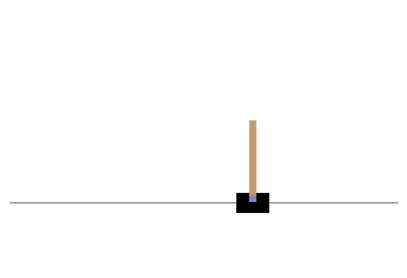

In [32]:

pi.eval()
env_cartpole = gym.make('CartPole-v1', render_mode='rgb_array')
s, _ = env_cartpole.reset(seed=random_seed)

num_steps = 200

episode_reward = 0
for step in range(num_steps):

    prob = pi(torch.from_numpy(s).float())
    a = prob.argmax().item()  # Select the action with the highest probability
    s, r, done, truncated, info = env_cartpole.step(a)

    # Render the environment
    render_env(env_cartpole)

env_cartpole.close()

---
## 6. A2C 강화학습 알고리즘 적용

---
### 6.1 A2C  알고리즘 구현

Actor-critic에서 향상된 알고리즘인 A2C 알고리즘을 구현해보겠습니다.

In [33]:
from torch.autograd import Variable

# Hyper Parameters
STATE_DIM = 4
ACTION_DIM = 2
STEP = 2000
SAMPLE_NUMS = 30


class ActorNetwork(nn.Module):

    def __init__(self,input_size,hidden_size,action_size):
        super(ActorNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.fc3 = nn.Linear(hidden_size,action_size)

    def forward(self,x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.log_softmax(self.fc3(out))
        return out

class ValueNetwork(nn.Module):

    def __init__(self,input_size,hidden_size,output_size):
        super(ValueNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.fc3 = nn.Linear(hidden_size,output_size)

    def forward(self,x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

def roll_out(actor_network,task,sample_nums,value_network,init_state):
    #task.reset()
    states = []
    actions = []
    rewards = []
    is_done = False
    final_r = 0
    state = init_state

    for j in range(sample_nums):
        states.append(state)
        log_softmax_action = actor_network(Variable(torch.Tensor([state])))
        softmax_action = torch.exp(log_softmax_action)
        action = np.random.choice(ACTION_DIM,p=softmax_action.cpu().data.numpy()[0])
        one_hot_action = [int(k == action) for k in range(ACTION_DIM)]
        next_state,reward,done,_,_ = task.step(action)
        #fix_reward = -10 if done else 1
        actions.append(one_hot_action)
        rewards.append(reward)
        final_state = next_state
        state = next_state
        if done:
            is_done = True
            state, _ = task.reset(seed=random_seed)
            break
    if not is_done:
        final_r = value_network(Variable(torch.Tensor([final_state]))).cpu().data.numpy()

    return states,actions,rewards,final_r,state

def discount_reward(r, gamma,final_r):
    discounted_r = np.zeros_like(r)
    running_add = final_r
    for t in reversed(range(0, len(r))):
        running_add = running_add * gamma + r[t]
        discounted_r[t] = running_add
    return discounted_r

---
### 6.2 Cartpole에 적용

A2C 알고리즘을 이용해 Cartpole 환경을 학습시켜보겠습니다.

알고리즘의 병렬 처리 설계 덕분에 학습 시간이 매우 빠릅니다.

In [34]:


# init a task generator for data fetching
task = gym.make("CartPole-v1")
init_state, _ = task.reset(seed=random_seed)

# init value network
value_network = ValueNetwork(input_size = STATE_DIM,hidden_size = 40,output_size = 1)
value_network_optim = torch.optim.Adam(value_network.parameters(),lr=0.01)

# init actor network
actor_network = ActorNetwork(STATE_DIM,40,ACTION_DIM)
actor_network_optim = torch.optim.Adam(actor_network.parameters(),lr = 0.01)

steps =[]
task_episodes =[]
test_results =[]

for step in range(STEP):
    states,actions,rewards,final_r,current_state = roll_out(actor_network,task,SAMPLE_NUMS,value_network,init_state)
    init_state = current_state
    actions_var = Variable(torch.Tensor(actions).view(-1,ACTION_DIM))
    states_var = Variable(torch.Tensor(states).view(-1,STATE_DIM))

    # train actor network
    actor_network_optim.zero_grad()
    log_softmax_actions = actor_network(states_var)
    vs = value_network(states_var).detach()
    # calculate qs
    qs = Variable(torch.Tensor(discount_reward(rewards,0.99,final_r)))

    advantages = qs - vs
    actor_network_loss = - torch.mean(torch.sum(log_softmax_actions*actions_var,1)* advantages)
    actor_network_loss.backward()
    torch.nn.utils.clip_grad_norm(actor_network.parameters(),0.5)
    actor_network_optim.step()

    # train value network
    value_network_optim.zero_grad()
    target_values = qs
    values = value_network(states_var)
    criterion = nn.MSELoss()
    value_network_loss = criterion(values,target_values)
    value_network_loss.backward()
    torch.nn.utils.clip_grad_norm(value_network.parameters(),0.5)
    value_network_optim.step()

    # Testing
    if (step + 1) % 50== 0:
            result = 0
            test_task = gym.make("CartPole-v0")
            for test_epi in range(10):
                state, _ = test_task.reset(seed=random_seed)
                for test_step in range(200):
                    softmax_action = torch.exp(actor_network(Variable(torch.Tensor([state]))))
                    #print(softmax_action.data)
                    action = np.argmax(softmax_action.data.numpy()[0])
                    next_state,reward,done,_,_ = test_task.step(action)
                    result += reward
                    state = next_state
                    if done:
                        break
            print("step:",step+1,"test result:",result/10.0)
            steps.append(step+1)
            test_results.append(result/10)

C:\Users\302-26\AppData\Local\Temp\ipykernel_9396\927451816.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(self.fc3(out))
C:\Users\302-26\AppData\Local\Temp\ipykernel_9396\1429407140.py:33: FutureWarning: `torch.nn.utils.clip_grad_norm` is now deprecated in favor of `torch.nn.utils.clip_grad_norm_`.
  torch.nn.utils.clip_grad_norm(actor_network.parameters(),0.5)
c:\Users\302-26\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([29])) that is different to the input size (torch.Size([29, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\302-26\AppData\Local\Temp\ipykernel_9396\1429407140.py:43: FutureWarning: `torch.nn.utils.clip_grad_norm` is now deprecated in favor of `torch.nn.utils.clip_grad_norm_`.


step: 50 test result: 200.0


c:\Users\302-26\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\302-26\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([27])) that is different to the input size (torch.Size([27, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\302-26\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([18])) that is different to the input size (torch.Size([18, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_l

step: 100 test result: 180.0


c:\Users\302-26\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


step: 150 test result: 61.0


c:\Users\302-26\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\302-26\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\302-26\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_l

step: 200 test result: 87.0


c:\Users\302-26\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\302-26\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([24])) that is different to the input size (torch.Size([24, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\302-26\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([21])) that is different to the input size (torch.Size([21, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_l

step: 250 test result: 24.0
step: 300 test result: 103.0
step: 350 test result: 200.0


c:\Users\302-26\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


step: 400 test result: 96.0
step: 450 test result: 127.0
step: 500 test result: 182.0
step: 550 test result: 200.0
step: 600 test result: 200.0
step: 650 test result: 66.0
step: 700 test result: 13.0
step: 750 test result: 11.0
step: 800 test result: 108.0
step: 850 test result: 45.0
step: 900 test result: 178.0
step: 950 test result: 200.0
step: 1000 test result: 123.0
step: 1050 test result: 141.0
step: 1100 test result: 94.0
step: 1150 test result: 107.0
step: 1200 test result: 188.0
step: 1250 test result: 200.0
step: 1300 test result: 200.0
step: 1350 test result: 194.0
step: 1400 test result: 200.0
step: 1450 test result: 200.0
step: 1500 test result: 200.0
step: 1550 test result: 200.0
step: 1600 test result: 200.0
step: 1650 test result: 200.0
step: 1700 test result: 200.0
step: 1750 test result: 200.0
step: 1800 test result: 200.0
step: 1850 test result: 200.0
step: 1900 test result: 200.0
step: 1950 test result: 200.0
step: 2000 test result: 200.0


학습된 모델을 이용해 Cartpole을 제어해보겠습니다.

### [TODO] Cartpole 환경을 시각화하는 코드를 완성해주세요. 

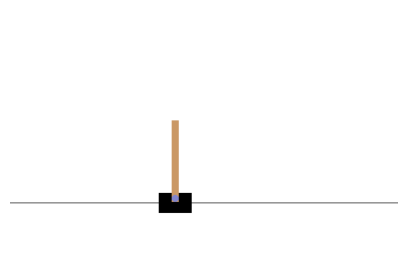

In [40]:

env_cartpole = gym.make('CartPole-v1', render_mode='rgb_array')
s, _ = env_cartpole.reset(seed=random_seed)

num_steps = 500

episode_reward = 0
for step in range(num_steps):
    
    #s = torch.from_numpy(s).float()
    a = torch.exp(actor_network(Variable(torch.Tensor([s]))))
    a = np.argmax(a.data.numpy()[0])  
    s, r, done, truncated, info = env_cartpole.step(a.item())

    # Render the environment
    render_env(env_cartpole)
    
env_cartpole.close()

In [41]:
import numpy as np
import torch
from torch.autograd import Variable
import imageio

random_seed = 42
env_cartpole = gym.make('CartPole-v1', render_mode='rgb_array')
s, _ = env_cartpole.reset(seed=random_seed)

frames = []
num_steps = 500
episode_reward = 0

for step in range(num_steps):
    # 정책 네트워크에 따라 행동 선택
    a = torch.exp(actor_network(Variable(torch.Tensor([s]))))
    a = np.argmax(a.data.numpy()[0])
    
    s, r, done, truncated, info = env_cartpole.step(a.item())
    
    # 프레임 수집
    frame = env_cartpole.render()  # numpy array (RGB image)
    frames.append(frame)

    if done or truncated:
        break

env_cartpole.close()

# GIF 저장
imageio.mimsave('cartpole2.gif', frames, fps=30)

C:\Users\302-26\AppData\Local\Temp\ipykernel_9396\927451816.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(self.fc3(out))


In [42]:
# 시뮬레이션 함수 정의
def simulate_cartpole_policy(actor_network, seed=42, max_steps=200):
    env = gym.make('CartPole-v1', render_mode='rgb_array')
    state, _ = env.reset(seed=seed)

    frames = [env.render()]  # 초기 프레임 수집

    for step in range(max_steps):
        # 정책에 따라 행동 선택
        state_tensor = Variable(torch.Tensor([state]))
        action_probs = torch.exp(actor_network(state_tensor))
        action = np.argmax(action_probs.data.numpy()[0])

        state, reward, done, truncated, info = env.step(action)
        frames.append(env.render())

        if done or truncated:
            print(f"{step+1} timesteps 만에 종료되었습니다.")
            break

    env.close()
    return frames




C:\Users\302-26\AppData\Local\Temp\ipykernel_9396\927451816.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(self.fc3(out))


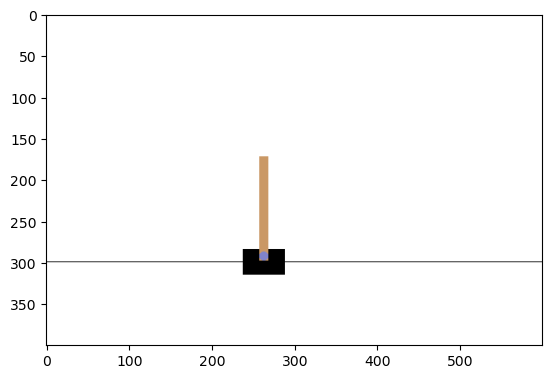

In [44]:
from torch.autograd import Variable
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
# 에이전트 실행 후 프레임 수집
frames = simulate_cartpole_policy(actor_network)

# matplotlib로 애니메이션 생성
fig = plt.figure()
ims = []
for frame in frames:
    im = plt.imshow(frame, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

# 노트북에서 시각화
HTML(ani.to_jshtml())

In [46]:
ani.save('CartPole-v1.gif', writer='Pillow', fps=30)

MovieWriter Pillow unavailable; using Pillow instead.
